<a href="https://colab.research.google.com/github/zebengberg/wasatch/blob/master/colab/GermanTankProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German Tank Problem
> Wasatch Academy Statistics Jan 2019

> Updated April 2021

---

During World War II, it was important for allied commanders to know the size of Germany’s armed forces so that they could allocate their own troops and resources accordingly. In particular, they need to know the total number of tanks in Germany’s arsenal. The allies could not capture and count ALL the German tanks (if they could, the war would have already ended).  Each tank had a sequential serial number on it: 1, 2, 3, and so on.  The number of tanks would then be equal to the highest serial number.  Allied forces were able to capture a handful of tanks and record their serial numbers.  They then enlisted a group of mathematicians in Washington DC to help them.  

The list of known serial numbers constituted the **sample**.  The mathematicians came up with a **statistic** -- a formula which they employed to **predict** the total number of German tanks from the known sample.   To see how accurate their statistic was, the Allies simulated the sampling process many times.  The mathematicians then studied the **distribution of predictions**.  This simulation gives what is known as a **sampling distribution** and it can be done for every statistic.  

In this activity, you will play the role of the mathematician by creating your own predictive statistic and analyzing its sampling distribution.

In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import trange

Below is a random sample of 10 of the first 100 whole numbers.  Each time you run the cell below, you will obtain a different random sample.

In [ ]:
print(np.random.choice(np.arange(1, 101), 10))

[100   1 100  97  44  24  14  75  77   6]


Suppose that the number $N$ is hidden from you, and you consider samples drawn from the whole numbers $1, 2, 3, 4, ..., N$.  Below you have a random sample of size 10.  Based on this sample, try to predict $N$.

In [ ]:
N = np.random.randint(100, 1000)
print(np.random.choice(np.arange(1, N+1), 10))

[482  28 402 144  51 384 214 443 218 190]


Do you have a prediction for $N$?  To check how close your prediction is to the truth, run the cell below.

In [ ]:
N

649

## Instructions

In this activity, you will be given a sample consisting of 50 of the first $N$ whole numbers.  Your goal is to create a function which, based on the values of the sample, predicts the number $N$.  The input of your function is the sample of the 50 known values, and the output of your function is your prediction for $N$.

Below we define the class `Predictions` which will:
- keep track of your prediction function
- simulate your function on samples using a trial value of $N=333$
- act as an agent to make a prediction from the competition sample using a hidden value of $N$

In [ ]:
class Predictions:
  
  def __init__(self, name):
    self.name = name
    self.predict = lambda x: None  # an empty function which will be filled
    self.N = 333  # a test number for simulation purposes
    self.predictions = []
    
    
  def batch_predict(self, n_samples):
    for _ in range(n_samples):
      sample = np.random.choice(self.N, 50)
      result = self.predict(sample)
      self.predictions.append(result)

  
  def hist(self):
    self.batch_predict(10000)
    bins = np.arange(self.N - 100, self.N + 100) - 0.5
    plt.figure(figsize=(12, 8))
    plt.hist(self.predictions, bins)
    plt.xlabel('Prediction Value')
    plt.ylabel('Frequency')
    plt.axvline(x=self.N, color='yellow')
    plt.show()
    
    
  def dotplot(self):
    dots = defaultdict(int)
    while True:
      print('Press ENTER, or give a number of samples, or type "stop"')
      run = input('')
      if run == 'stop':
        break

      try:
        n_samples = int(run)
      except ValueError:
        n_samples = 1
        
      self.batch_predict(n_samples)
      preds = self.predictions[-n_samples:]
      
      for pred in preds:
        dots[pred] += 1

      clear_output()
      plt.figure(figsize=(10, 6))
      plt.xlim(
          min(self.N - 5, min(dots.keys()) - 1),
          max(self.N + 5, max(dots.keys()) + 1)
      )
      plt.ylim(0, max(10, max(dots.values()) + 1))
      plt.xlabel('Predicted N')
      plt.ylabel('Number of predictions')
      plt.axvline(x=self.N, color='yellow')

      x, y = [], []
      for k, v in dots.items():
        x += [k for s in range(v)] 
        y += list(range(1, v + 1))

      plt.plot(x, y, 'bo')
      plt.plot(self.predictions[-1], dots[self.predictions[-1]], 'ro')
      plt.show()

## Demonstration

Here we define an object called `harold`.  We record its prediction function as `harold.f`.  Note that our prediction function takes the maximum of the given sample.

In [ ]:
harold = Predictions('harold')
harold.predict = lambda x: np.max(x)

We pull samples of size 50 from the numbers $1, 2, 3, ..., N$ where $N=333$.  The `harold` prediction function gives the max value of the sample set.  Below is a dotplot of this process over many samples.  The true value of $N$ is the yellow vertical line.

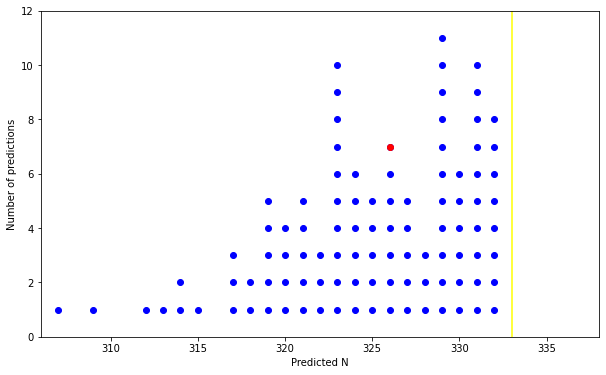

Press ENTER, or give a number of samples, or type "stop"
stop


In [ ]:
harold.dotplot()

If we continue to do this for 10000 samples, we obtain the following histogram.  The bin-size of this histogram is 1.

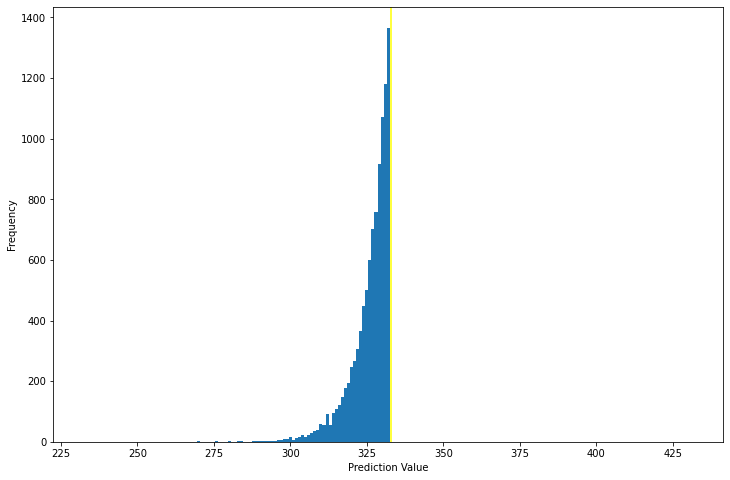

In [ ]:
harold.hist()

Below are several examples of `Predictions` object.  The objects all contain their own demo functions.

In [ ]:
annie = Predictions('annie')
annie.predict = lambda x:  np.percentile(x, 40) + np.percentile(x, 60)


billy = Predictions('billy')
billy.predict = lambda x: 300 + np.percentile(x, 30)**(.8)


agents = [harold, annie, billy]

We can visualize their histograms on the same axes to get a sense of their shape, bias, center, and spread.  We run each prediction function on 10,000 samples.

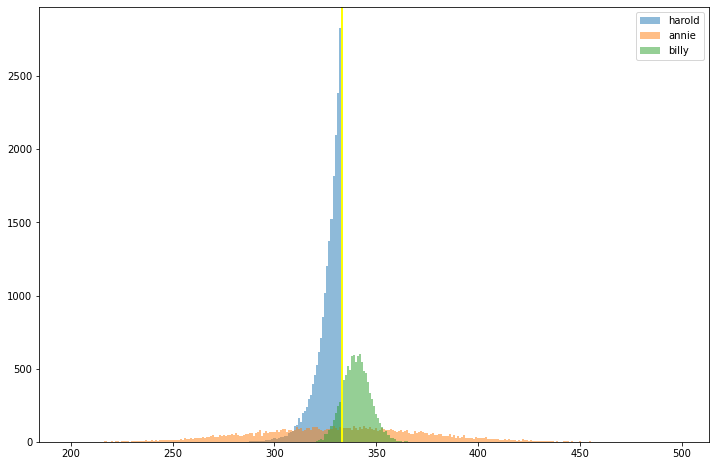

In [ ]:
bins = np.arange(200, 500) - 0.5

plt.figure(figsize=(12, 8))

for agent in agents:
  agent.batch_predict(10000)
  plt.hist(agent.predictions, bins, alpha=0.5, label=agent.name)
  plt.axvline(x=agent.N, color='yellow')

plt.legend(loc='upper right')
plt.show()

A histogram inspiring by student questions.  The three statistics below sum the $k$th percentile with the $(100-k)$th percentile.  Note the spread of the three sampling distributions.

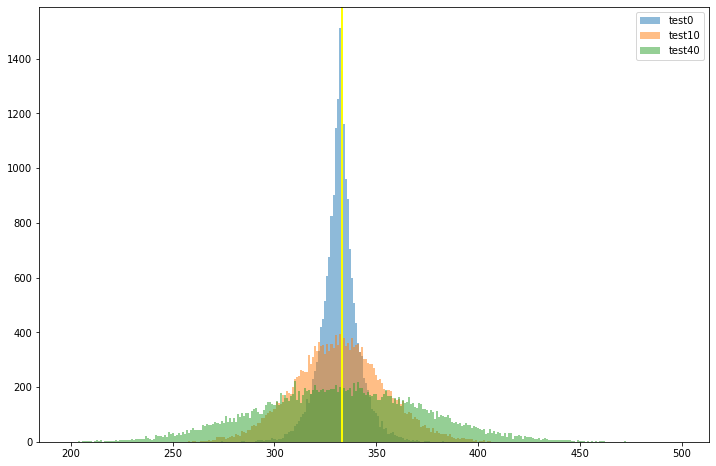

In [ ]:
agents = [Predictions('test0'), Predictions('test10'), Predictions('test40')]

agents[0].predict = lambda x: np.percentile(x, 0) + np.percentile(x, 100)
agents[1].predict = lambda x: np.percentile(x, 10) + np.percentile(x, 90)
agents[2].predict = lambda x: np.percentile(x, 40) + np.percentile(x, 60)


bins = np.arange(200, 500) - 0.5

plt.figure(figsize=(12, 8))

for agent in agents:
  agent.batch_predict(20000)
  
  plt.hist(agent.predictions, bins, alpha=0.5, label=agent.name)
  plt.axvline(x=agent.N, color='yellow')

plt.legend(loc='upper right')
plt.show()

## Student Statistics, Jan 2019

In [ ]:
agents = []

####################
# Sam, Monty, Willow
####################

agent = Predictions('smw')
agent.predict = lambda x: int(np.max(x) + (np.max(x) - np.min(x)) / 49)
agents.append(agent)

agent = Predictions('smw2')
agent.predict = lambda x: int(np.max(x) + np.min(x))
agents.append(agent)


#####################
# Arina, Sean, Karuna
#####################

agent = Predictions('ksa')
agent.predict = lambda x: int(np.min(x) + 2*(np.percentile(x, 75) - np.percentile(x, 25)))
agents.append(agent)

agent = Predictions('ksa2')
agent.predict = lambda x: int(np.mean(x) + np.percentile(x, 75) - np.percentile(x, 25))
agents.append(agent)


####################
# Teagan, Mae, Logan
####################

agent = Predictions('toejam')
agent.predict = lambda x: int(np.max(x) + .05*np.std(x))
agents.append(agent)

agent = Predictions('toejam2')
agent.predict = lambda x: int(np.percentile(x, 5) + np.percentile(x, 95))
agents.append(agent)

### The tournament

Now that we have all of the agents with their prediction functions, they will compete to predict the number $N$ with the most accuracy.

We run one million rounds in this tournament.  In each round, the agents make predictions, and we track various errors between their prediction and the truth.

In [ ]:
for agent in agents:
  agent.mse = 0  # mean squared error
  agent.mae = 0  # mean absolute error
  agent.mde = 0  # mean diff (signed) error
  agent.n_bullseye = 0


n_rounds = 100_000
for _ in trange(n_rounds):
  N = np.random.randint(500, 1000) # The hidden number to be used in the round.
  sample = np.random.choice(N, 50) # The sample which is known by all agents.

  for agent in agents:
    pred = agent.predict(sample)
    error = pred - N
    agent.mde += error
    agent.mae += abs(error)
    agent.mse += error ** 2
    if error == 0:
      agent.n_bullseye += 1

for agent in agents:
  agent.mde /= n_rounds
  agent.mae /= n_rounds
  agent.mse /= n_rounds

Printing the results.

In [ ]:
long_names = {
    'mae': 'Mean Absolute Error',
    'mse': 'Mean Squared Error',
    'mde': 'Mean Signed Error',
    'n_bullseye': 'Number of Bullseyes'
}
for metric in ['mae', 'mse', 'mde', 'n_bullseye']:
  scores = [(agent.name, getattr(agent, metric)) for agent in agents]
  scores = sorted(scores, key=lambda x: x[1])
  print(f'{"NAME" : <10}{long_names[metric].upper()}')
  for score in scores:
    name, value = score
    print(f'{name : <10}{value}')

  print('\n' + '#' * 50 + '\n\n')

NAME      MEAN ABSOLUTE ERROR
toejam    10.26847
smw       10.69202
smw2      14.7326
toejam2   28.52363
ksa2      49.06096
ksa       82.15067

##################################################


NAME      MEAN SQUARED ERROR
smw       227.18292
toejam    249.51639
smw2      443.4638
toejam2   1401.34889
ksa2      3949.19126
ksa       10941.57789

##################################################


NAME      MEAN SIGNED ERROR
ksa2      -15.44744
ksa       -15.08911
toejam    -4.98399
toejam2   -1.28011
smw       -0.9659
smw2      -0.96396

##################################################


NAME      NUMBER OF BULLSEYES
ksa       398
ksa2      704
toejam2   1203
smw       2845
smw2      3208
toejam    3677

##################################################




## Student Statistics, April 2021

In [ ]:
agents = []

########################
# Griff, Nikki, Kai, Anh
########################

agent = Predictions('gank mean')
agent.predict = lambda x: int(np.mean(x) + 7/4 * np.std(x))
agents.append(agent)

agent = Predictions('gank median')
agent.predict = lambda x: int(np.median(x) + 7/4 * np.std(x))
agents.append(agent)

agent = Predictions('gank diff')
agent.predict = lambda x: int((1 + 1 / (np.max(x) - np.min(x))) * np.max(x))
agents.append(agent)

##############
# Emily, Ryder 
##############

agent = Predictions('cobra')
agent.predict = lambda x: int(2 * np.mean(x))
agents.append(agent)

agent = Predictions('snake')
agent.predict = lambda x: int(np.percentile(x, 25) + np.percentile(x, 75))
agents.append(agent)

##################################
# Gab, Sammy, Chris, Hiroki, Roger
##################################

agent = Predictions('sammy')
agent.predict = lambda x: int(2 * np.mean(x))
agents.append(agent)

agent = Predictions('hiroki')
agent.predict = lambda x: int(np.percentile(x, 25) + np.percentile(x, 75))
agents.append(agent)

agent = Predictions('chris')
agent.predict = lambda x: int(np.percentile(x, 25) + np.percentile(x, 75))
agents.append(agent)

agent = Predictions('jesus')
agent.predict = lambda x: int(np.max(x) + ((np.percentile(x, 10) + np.percentile(x, 90)) / 2 - 50) / 50)
agents.append(agent)

###################
# Brody, Ryan, Luke
###################

agent = Predictions('brody')
agent.predict = lambda x: int(51 / 50 * np.max(x) - 6)
agents.append(agent)

agent = Predictions('luke')
agent.predict = lambda x: int(np.max(x) + np.max(x) / (np.min(x) + 1) - 25)
agents.append(agent)

########################
# Zac, David, Ethan, Leo
########################

def predict(x):
  x = sorted(x)
  means = [np.mean(x[i: i + 5]) for i in range(0, 50, 5)]
  return np.mean(means)

agent = Predictions('nihao')
agent.predict = predict
agents.append(agent)

###############
# Engberg Roger
###############

agent = Predictions('engberg-roger')
agent.predict = lambda x: int(np.max(x) + 12)
agents.append(agent)

In [ ]:
for agent in agents:
  agent.mse = 0  # mean squared error
  agent.mae = 0  # mean absolute error
  agent.mde = 0  # mean diff (signed) error
  agent.n_bullseye = 0


n_rounds = 100_000
for _ in trange(n_rounds):
  N = np.random.randint(500, 1000) # The hidden number to be used in the round.
  sample = np.random.choice(N, 50) # The sample which is known by all agents.

  for agent in agents:
    pred = agent.predict(sample)
    error = pred - N
    agent.mde += error
    agent.mae += abs(error)
    agent.mse += error ** 2
    if error == 0:
      agent.n_bullseye += 1

for agent in agents:
  agent.mde /= n_rounds
  agent.mae /= n_rounds
  agent.mse /= n_rounds

In [ ]:
long_names = {
    'mae': 'Mean Absolute Error',
    'mse': 'Mean Squared Error',
    'mde': 'Mean Signed Error',
    'n_bullseye': 'Number of Bullseyes'
}
for metric in ['mae', 'mse', 'mde', 'n_bullseye']:
  scores = [(agent.name, getattr(agent, metric)) for agent in agents]
  scores = sorted(scores, key=lambda x: x[1])
  print(f'{"NAME" : <15}{long_names[metric].upper()}')
  for score in scores:
    name, value = score
    print(f'{name : <15}{value}')

  print('\n' + '#' * 50 + '\n\n')

NAME           MEAN ABSOLUTE ERROR
engberg-roger  10.276
brody          10.57708
jesus          11.05805
gank diff      14.19963
gank mean      31.26424
gank median    45.63872
cobra          48.93318
sammy          48.93318
snake          59.42686
hiroki         59.42686
chris          59.42686
luke           108.82571
nihao          375.15646720000274

##################################################


NAME           MEAN SQUARED ERROR
engberg-roger  230.98952
brody          270.23454
jesus          304.05359
gank diff      422.43343
gank mean      1598.33148
gank median    3382.96654
cobra          3900.56936
sammy          3900.56936
snake          5764.82336
hiroki         5764.82336
chris          5764.82336
luke           42911.18131
nihao          146900.11765291056

##################################################


NAME           MEAN SIGNED ERROR
nihao          -375.15646720000274
gank diff      -14.19963
jesus          -9.20305
brody          -6.99432
engberg-roger  -3.